In [1]:
import concurrent.futures
import cloudpickle
import pickle
import gzip
import os
import numpy as np
from collections import defaultdict, OrderedDict
from coffea import hist, processor 
from coffea.util import load, save
from util.futures_patch import patch_mp_connection_bpo_17560

In [6]:
import os
import random

path ='../hists/darkhiggs2018/'
files = os.listdir(path)
index = random.randrange(0, 10)
print(files[:10])
for f in file:
  

['ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8____6_.futures', 'ZJetsToNuNu_HT-100To200_13TeV-madgraph____17_.futures', 'EGamma____112_.futures', 'EGamma____317_.futures', 'QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8____35_.futures', 'EGamma____165_.futures', 'TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8____163_.futures', 'EGamma____88_.futures', 'QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8____20_.futures', 'EGamma____155_.futures']


In [10]:
load('../hists/darkhiggs2018/ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8____6_.futures')

{'sumw': <Hist (dataset,sumw) instance at 0x7f1c17b7ae10>,
 'cutflow': <Hist (dataset,region,cut) instance at 0x7f1c17b71ac8>,
 'template': <Hist (dataset,region,systematic,gentype,recoil,fjmass,ZHbbvsQCD) instance at 0x7f1c17b71160>,
 'recoil': <Hist (dataset,region,gentype,recoil) instance at 0x7f1c17a2e128>,
 'recoilphiWRF': <Hist (dataset,region,gentype,recoilphiWRF) instance at 0x7f1c17a2e908>,
 'mindphirecoil': <Hist (dataset,region,gentype,mindphirecoil) instance at 0x7f1c17a2ef60>,
 'fjmass': <Hist (dataset,region,gentype,fjmass) instance at 0x7f1c17a35828>,
 'CaloMinusPfOverRecoil': <Hist (dataset,region,gentype,CaloMinusPfOverRecoil) instance at 0x7f1c17a35fd0>,
 'met': <Hist (dataset,region,gentype,met) instance at 0x7f1c17a3b908>,
 'metphi': <Hist (dataset,region,gentype,metphi) instance at 0x7f1c17a40128>,
 'mindphimet': <Hist (dataset,region,gentype,mindphimet) instance at 0x7f1c17a40978>,
 'j1pt': <Hist (dataset,region,gentype,j1pt) instance at 0x7f1c17a47208>,
 'j1eta':

In [ ]:
def reduce(folder,_dataset=None,variable=None):

    lists = {}
    for filename in os.listdir(folder):
        if '.futures' not in filename: continue
        if filename.split("____")[0] not in lists: lists[filename.split("____")[0]] = []
        lists[filename.split("____")[0]].append(folder+'/'+filename)
          
    for pdi in lists.keys():
          if _dataset is not None and _dataset not in pdi: continue
          tmp={}
          for filename in lists[pdi]:
               print('Opening:',filename)
               hin = load(filename)
          for k in hin.keys():
            if variable is not None and k!=variable: continue
            print('Considering variable',k)
            if k not in tmp: tmp[k]=[hin[k]]
            else: tmp[k].append(hin[k])
          del hin
      for k in tmp:
        tmp_arr=futuresum(np.array(tmp[k]))
        hists = {}
        hists[k]=tmp_arr[0]
        dataset = hist.Cat("dataset", "dataset", sorting='placement')
        dataset_cats = ("dataset",)
        dataset_map = OrderedDict()
      for d in hists[k].identifiers('dataset'):
          if d.name.split("____")[0] not in dataset_map: dataset_map[d.name.split("____")[0]] = (d.name.split("____")[0]+"*",)
        hists[k] = hists[k].group(dataset_cats, dataset, dataset_map)
        print(hists)
        save(hists, folder+'/'+k+'--'+pdi+'.reduced')

In [17]:
import numpy as np
x = np.arange(7.0)
np.array_split(x, 5)

[array([0., 1.]), array([2., 3.]), array([4.]), array([5.]), array([6.])]

In [13]:
x

array([0., 1., 2., 3., 4., 5., 6.])

In [18]:
load('TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8____162_.futures')

{'sumw': <Hist (dataset,sumw) instance at 0x7f1c17b7ab70>,
 'mT': <Hist (dataset,region,mT) instance at 0x7f1c179cf278>,
 'eT_miss': <Hist (dataset,region,eT) instance at 0x7f1c179cf710>,
 'ele_pT': <Hist (dataset,region,pT) instance at 0x7f1c179cf9e8>,
 'mu_pT': <Hist (dataset,region,pT) instance at 0x7f1c179cfcc0>,
 'jet_pT': <Hist (dataset,region,pT) instance at 0x7f1c179cff60>,
 'dphi_e_etmiss': <Hist (dataset,region,dphi) instance at 0x7f1c17991080>,
 'dphi_mu_etmiss': <Hist (dataset,region,dphi) instance at 0x7f1c17991198>,
 'cutflow': defaultdict_accumulator(int,
                         {'all events': 608195,
                          'tight_e': 48148,
                          'tight_mu': 77654,
                          'loose_e': 109615,
                          'loose_mu': 109910,
                          'met>100': 32,
                          'met_triggers': 37958,
                          'ele_triggers': 66109,
                          'mu_triggers': 92889,
        

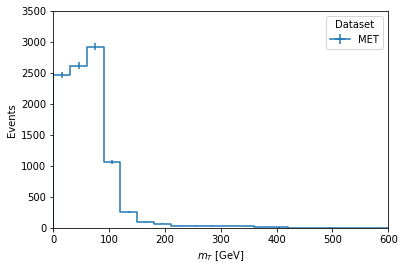

In [38]:
hist.plot1d((load('MET____46_.futures') + load('MET____46_.futures'))['mT'].integrate('region'))

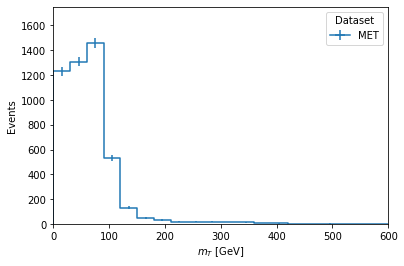

In [36]:
hist.plot1d(load('MET____46_.futures')['mT'].integrate('region'))

In [22]:
load('ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8____74_.futures')['cutflow'] + load('MET____46_.futures')['cutflow']

defaultdict_accumulator(int,
                        {'all events': 2371954,
                         'tight_e': 29268,
                         'tight_mu': 81046,
                         'loose_e': 93425,
                         'loose_mu': 121787,
                         'met>100': 64,
                         'met_triggers': 808050,
                         'ele_triggers': 64338,
                         'mu_triggers': 114605,
                         'Delta_Phi_Met_LJ': 926079,
                         'DeltaR_LJ_Mu': 71906,
                         'exactly_1_medium_btag': 591531,
                         'DeltaR_LJ_Ele': 25911})